<a href="https://colab.research.google.com/github/Shamanth-KM/phi-demand-intent-lora/blob/main/notebooks/03_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Upgrade Hugging Face Transformers to the latest version
!pip install --upgrade transformers

In [5]:
# Upgrade Hugging Face Evaluate and Datasets
!pip install --upgrade evaluate datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" an

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import AutoModelForSequenceClassification
from peft import LoraConfig, get_peft_model

# Loading the tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)

# Set padding token
tokenizer.pad_token = tokenizer.eos_token

# Loading the base model
base_model = AutoModelForSequenceClassification.from_pretrained(
    "microsoft/phi-1_5",
    trust_remote_code=True,
    num_labels=5  # because you have 5 classes
)

print("Tokenizer and base model are loaded!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/237 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/736 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

Some weights of PhiForSequenceClassification were not initialized from the model checkpoint at microsoft/phi-1_5 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizer and base model are loaded!


In [2]:
# Defining LoRA parameters
lora_config = LoraConfig(
    r=16,  # rank
    lora_alpha=32,  # scaling factor
    target_modules=["q_proj", "k_proj", "v_proj"],  # projections (using safe defaults)
    lora_dropout=0.05,  # using small dropout to prevent overfitting
    bias="none",  # we are not adapting biases
    task_type="CAUSAL_LM"  # type of task
)

# Apply LoRA to the base model
base_model = get_peft_model(base_model, lora_config)

print("LoRA configuration is applied to the model")


LoRA configuration is applied to the model


In [3]:
# Let's look at which parts of the model are trainable now
base_model.print_trainable_parameters()

trainable params: 4,718,592 || all params: 1,318,090,752 || trainable%: 0.3580


In [4]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [5]:
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

# Let's re-upload the csv file needed
from google.colab import files
uploaded_file = files.upload()

# Get the file name
file_name = list(uploaded_file.keys())[0]

# Read the file to a pandas DataFrame
sales_notes = pd.read_csv(file_name)

# Check the first few rows
sales_notes.head(10)

Saving sales_notes_5000.csv to sales_notes_5000.csv


,id,sales_note,label
0,1,Request to modify packaging dimensions before ...,Custom Spec
1,2,inventory outage pls expedite shipping if poss...,Urgent Need
2,3,Exploring samples for a new product line.,New Product Demand
3,4,Interest shown in 2025x prototype by client,New Product Demand
4,5,Firstorder placed for updated product variant.,New Product Demand
5,6,backorders increasing need quick replenishment,Stocking Issue
6,7,client needs same order as last month for prod...,Repeat Order
7,8,Demo units requested to evaluate updated model...,New Product Demand
8,9,inventory outage pls expedite shipping if poss...,Urgent Need
9,10,Stockout reported for Model X1.,Stocking Issue


In [14]:
# Convert it into Hugging Face Dataset format
sales_hf = Dataset.from_pandas(sales_notes)
print(sales_hf)

# Loading the Phi-1.5 tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-1_5", trust_remote_code=True)

# Phi-1.5's tokenizer does not have a pad_token defined by default.
'''
Decoder models (like GPT, Phi) usually don't need padding when generating text — but for training a classification model,
we do need padding to batch inputs of different lengths.
'''
tokenizer.pad_token = tokenizer.eos_token
base_model.config.pad_token_id = tokenizer.pad_token_id


# Let's define a tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples["sales_note"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

# Applying tokenization
sales_tokenized = sales_hf.map(tokenize_function, batched=True)

# Checking the structure after tokenization
print(sales_tokenized)

Dataset({
    features: ['id', 'sales_note', 'label'],
    num_rows: 5000
})


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'sales_note', 'label', 'input_ids', 'attention_mask'],
    num_rows: 5000
})


In [15]:
# Encode labels and split dataset

# Let's create a list of all unique labels
labels_list = list(set(sales_notes["label"]))
labels_list.sort()  # To keep consistent ordering

# Creating a mapping from label name to numeric ID
label_to_id = {label: idx for idx, label in enumerate(labels_list)}
id_to_label = {idx: label for label, idx in label_to_id.items()}

print("Label mapping is created successfully")
print(label_to_id)

# Now let's map the text labels to numeric labels inside the tokenized dataset
def encode_labels(example):
    return {"labels": label_to_id[example["label"]]}

# Apply the label encoding
sales_tokenized = sales_tokenized.map(encode_labels)

# Removing the old 'label' column
sales_tokenized = sales_tokenized.remove_columns(["label"])

print("Labels are successfully encoded")
print(sales_tokenized)

# Let's split the dataset into training and validation sets
sales_split = sales_tokenized.train_test_split(test_size=0.4, seed=42)

train_sales = sales_split["train"]
val_sales = sales_split["test"]

print(f"\nDataset is split. Training size: {len(train_sales)}, Validation size: {len(val_sales)}")


Label mapping is created successfully
{'Custom Spec': 0, 'New Product Demand': 1, 'Repeat Order': 2, 'Stocking Issue': 3, 'Urgent Need': 4}


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Labels are successfully encoded
Dataset({
    features: ['id', 'sales_note', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 5000
})

Dataset is split. Training size: 3000, Validation size: 2000


In [9]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.9 MB/s eta 0:00:00


In [16]:
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import evaluate

In [20]:
# Let's set up TrainingArguments and Trainer

# Define the evaluation metric - Accuracy
accuracy_metric = evaluate.load("accuracy")

# Metric computation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    acc = accuracy_metric.compute(predictions=predictions, references=labels)
    return {"accuracy": acc["accuracy"]}

# Define TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",           # Where to save model files
    per_device_train_batch_size=3,     # Training batch size
    per_device_eval_batch_size=3,      # Evaluation batch size
    num_train_epochs=3,                # Number of training epochs
    learning_rate=2e-4,                # Learning rate
    weight_decay=0.01,                 # Weight decay
    save_steps=100,                    # Save model checkpoint every 100 steps
    save_total_limit=2,                # Only keep 2 latest checkpoints
    metric_for_best_model="accuracy",  # Metric to decide best model
    greater_is_better=True,            # Higher accuracy is better
    report_to="none"                   # No external logging (e.g., WandB)
)

print("TrainingArguments ready")

TrainingArguments ready


In [21]:
# Initialize the Trainer
trainer = Trainer(
    model=base_model,
    args=training_args,
    train_dataset=train_sales,
    eval_dataset=val_sales,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

print("Trainer initialized")


<ipython-input-21-45956fce6615>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Trainer initialized


In [22]:
trainer.train()

Step,Training Loss
500,0.126900
1000,0.000000
1500,0.000000
2000,0.000000
2500,0.000000
3000,0.000000


TrainOutput(global_step=3000, training_loss=0.02116131474543363, metrics={'train_runtime': 1650.3442, 'train_samples_per_second': 5.453, 'train_steps_per_second': 1.818, 'total_flos': 8385867546624000.0, 'train_loss': 0.02116131474543363, 'epoch': 3.0})

In [24]:
# Save the fine-tuned LoRA adapter
base_model.save_pretrained("./results/lora_phi15_demand_signal_adapter")
tokenizer.save_pretrained("./results/lora_phi15_demand_signal_adapter")

print("LoRA adapter and tokenizer saved")

LoRA adapter and tokenizer saved


In [25]:
trainer.evaluate()

{'eval_loss': 7.690231541346293e-06,
 'eval_accuracy': 1.0,
 'eval_runtime': 186.1905,
 'eval_samples_per_second': 10.742,
 'eval_steps_per_second': 3.582,
 'epoch': 3.0}

In [26]:
# Save the fine-tuned LoRA adapter and tokenizer
save_path = "./results/lora_phi15_demand_signal_adapter"

base_model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

print(f"Model and tokenizer saved to {save_path}!")


Model and tokenizer saved to ./results/lora_phi15_demand_signal_adapter!


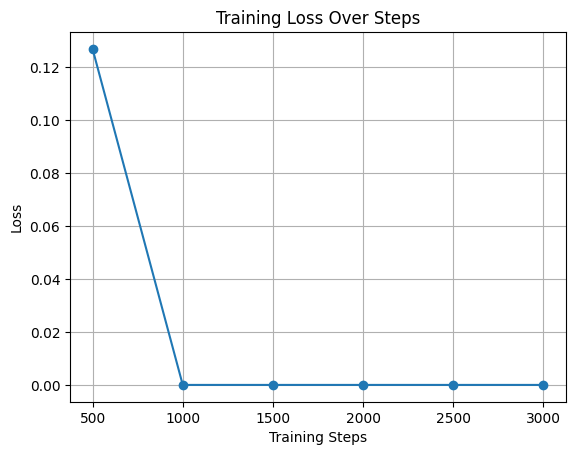

In [27]:
import matplotlib.pyplot as plt

# Extract training logs
logs = trainer.state.log_history

# Filter only the steps that have loss logged
loss_values = [log["loss"] for log in logs if "loss" in log]
steps = [log["step"] for log in logs if "loss" in log]

# Plot
plt.plot(steps, loss_values, marker='o')
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Steps")
plt.grid(True)
plt.show()
